# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [3]:
salaries = pd.read_csv(
    '../Current_Employee_Names__Salaries__and_Position_Titles.csv'
)

Examine the `salaries` dataset using the `head` function below.

In [4]:
salaries.head(3)

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
salaries.isnull().sum() * 100 / salaries.shape[0]

Name                  0.000000
Job Titles            0.000000
Department            0.000000
Full or Part-Time     0.000000
Salary or Hourly      0.000000
Typical Hours        75.824971
Annual Salary        24.175029
Hourly Rate          75.824971
dtype: float64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
salaries['Salary or Hourly'].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
salaries['Department'].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
hour_serie = salaries['Hourly Rate'].dropna()

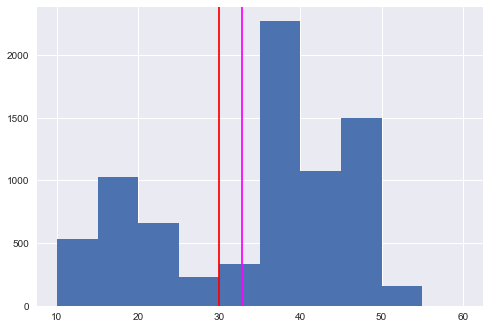

In [9]:
bins = np.arange(10,61,5)
plt.hist(hour_serie, bins=bins)
plt.axvline(hour_serie.mean(),color='magenta')
plt.axvline(30,color='red');

In [10]:
# H0: µ = x  ("the sample mean is equal to the [proposed] population mean")
# H1: µ ≠ x  ("the sample mean is not equal to the [proposed] population mean")
H0 = 30
ss.ttest_1samp(hour_serie, H0)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

In [11]:
alpha = 0.05
pvalue = ss.ttest_1samp(hour_serie, H0).pvalue
if pvalue/2 < alpha:
    print('H1: µ ≠ x; "the sample mean is not equal to the [proposed] population mean"')
else:
    print('H0: µ = x; "the sample mean is equal to the [proposed] population mean"')

H1: µ ≠ x; "the sample mean is not equal to the [proposed] population mean"


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [12]:
police_serie = salaries[salaries['Department'] == 'POLICE']['Annual Salary'].dropna()
H0 = 86_000

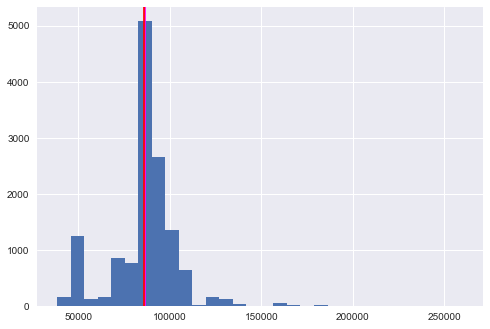

In [13]:
plt.hist(police_serie, bins=30)
plt.axvline(police_serie.mean(),color='magenta')
plt.axvline(H0,color='red');

In [14]:
# H0: µ = x  ("the sample mean is equal to the [proposed] population mean")
# H1: µ ≠ x  ("the sample mean is not equal to the [proposed] population mean")
ss.ttest_1samp(police_serie, H0)

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

In [15]:
alpha = 0.05
pvalue = ss.ttest_1samp(police_serie, H0).pvalue
if pvalue/2 < alpha:
    print('H1: µ ≠ x; "the sample mean is not equal to the [proposed] population mean"')
else:
    print('H0: µ = x; "the sample mean is equal to the [proposed] population mean"')

H1: µ ≠ x; "the sample mean is not equal to the [proposed] population mean"


Using the `crosstab` function, find the department that has the most hourly workers. 

In [16]:
pd.crosstab(
    index=salaries['Department'],
    columns='Count',
    values=salaries['Hourly Rate'],
    aggfunc='count'
).sort_values(by='Count',ascending=False)

col_0,Count
Department,
STREETS & SAN,1862
WATER MGMNT,1513
OEMC,1273
AVIATION,1082
GENERAL SERVICES,765
TRANSPORTN,725
PUBLIC LIBRARY,299
FAMILY & SUPPORT,287
CITY COUNCIL,64


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [17]:
streets_serie = salaries[salaries['Department'] == 'STREETS & SAN']['Hourly Rate'].dropna()
H0 = 35

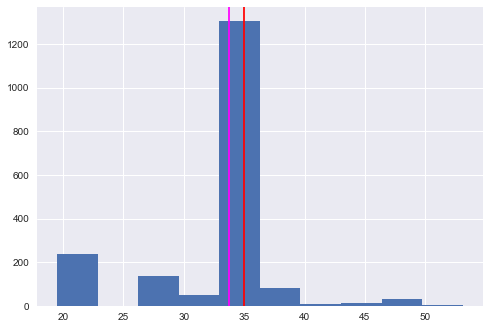

In [18]:
plt.hist(streets_serie, bins=10)
plt.axvline(streets_serie.mean(),color='magenta')
plt.axvline(H0,color='red');

In [19]:
# H0: µ = x  ("the sample mean is equal to the [proposed] population mean")
# H1: µ ≠ x  ("the sample mean is not equal to the [proposed] population mean")
ss.ttest_1samp(streets_serie, H0)

Ttest_1sampResult(statistic=-9.567447887848152, pvalue=3.3378530564707717e-21)

In [20]:
alpha = 0.05
pvalue = ss.ttest_1samp(streets_serie, H0).pvalue
if pvalue/2 < alpha:
    print('H1: µ ≠ x; "the sample mean is not equal to the [proposed] population mean"')
else:
    print('H0: µ = x; "the sample mean is equal to the [proposed] population mean"')

H1: µ ≠ x; "the sample mean is not equal to the [proposed] population mean"


# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [21]:
confidence_level = 0.95
degrees_freedom = len(hour_serie) - 1
sample_mean = hour_serie.mean()
sample_standard_error = ss.sem(hour_serie)

confidence_interval = ss.t.interval(
    confidence_level,
    degrees_freedom,
    sample_mean,
    sample_standard_error
)

In [22]:
confidence_interval

(32.52345834488529, 33.05365708767727)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [23]:
confidence_level = 0.95
degrees_freedom = len(police_serie) - 1
sample_mean = police_serie.mean()
sample_standard_error = ss.sem(police_serie)

confidence_interval = ss.t.interval(
    confidence_level,
    degrees_freedom,
    sample_mean,
    sample_standard_error
)

In [24]:
confidence_interval

(86177.05631531784, 86795.77269094894)

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [25]:
from statsmodels.stats.proportion import proportions_ztest

In [26]:
hour_serie.std()

12.11257268427681

In [ ]:
proportions_ztest()